In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/sansk/OneDrive/Desktop/CapstoneCombine/extracted_1.csv')  # Replace with your dataset file

# Extract the class column
y = data.iloc[:, -1]  # Last column is the class column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Drop the name columns (first two columns)
X = data.iloc[:, 2:-1]  # Exclude the first two columns and the last column

In [22]:
 #Step 2: Preprocess Categorical Features (if any)
# If you have categorical features, one-hot encode them
#categorical_cols = ['categorical_column1', 'categorical_column2']  # Replace with your categorical column names
#X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 3: Impute Missing Values (if any)
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy if needed
#X = imputer.fit_transform(X)

In [3]:
# Step 4: Feature Selection using XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

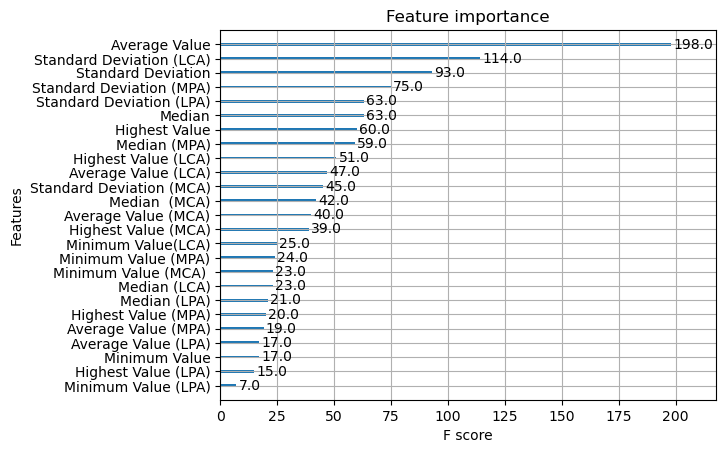

In [4]:
plot_importance(xgb_model)
plt.show()

In [5]:
feature_importances = xgb_model.feature_importances_

In [6]:
print(feature_importances)

[0.01471559 0.3264958  0.         0.23305996 0.02534062 0.05181107
 0.01123037 0.05070365 0.         0.01628123 0.01361387 0.02071237
 0.01505838 0.01565683 0.         0.01721114 0.01573632 0.00473992
 0.01619488 0.03745282 0.         0.0109113  0.00926956 0.01781356
 0.00571771 0.01288331 0.         0.02283753 0.02560461 0.00894762
 0.        ]


In [7]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(xgb_model, threshold='median')  # You can adjust the threshold as needed
selector.fit(X, y)
X_selected = selector.transform(X)

In [8]:
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # Example: Three hidden layers with 128, 64, and 32 neurons
    max_iter=1000,
    random_state=42
)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

mlp_classifier.fit(X_train, y_train)

predictions = mlp_classifier.predict(X_test)

In [28]:
# Step 6: Perform Classification using MLP and Selected Features
#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
#mlp_classifier.fit(X_train, y_train)

#predictions = mlp_classifier.predict(X_test)

In [18]:
print(predictions)

[0 4 4 4 4 4 4 4 0 4 4 0 4 4 4 4 0 4 4 4 4 4 4 0 0 0 4 0 4 0 4 0 0 4 4 0 4
 0 4 4 4 4 0 4 0 4 0 4 4]


In [10]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5306122448979592


In [11]:
confusion = confusion_matrix(y_test, predictions)

In [33]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

Accuracy: 0.5510204081632653
Confusion Matrix:
[[ 9  0  1  0  1]
 [ 2  0  1  1  1]
 [ 2  0  0  1  2]
 [ 0  3  1  3  2]
 [ 1  2  0  1 15]]
Classification Report:
              precision    recall  f1-score   support

     Class 1       0.64      0.82      0.72        11
     Class 2       0.00      0.00      0.00         5
     Class 3       0.00      0.00      0.00         5
     Class 4       0.50      0.33      0.40         9
     Class 5       0.71      0.79      0.75        19

    accuracy                           0.55        49
   macro avg       0.37      0.39      0.37        49
weighted avg       0.51      0.55      0.53        49



In [17]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = predictions.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,0,0
1,4,3
2,4,4
3,4,3
4,4,3
5,4,3
6,4,4
7,4,4
8,0,0
9,4,1


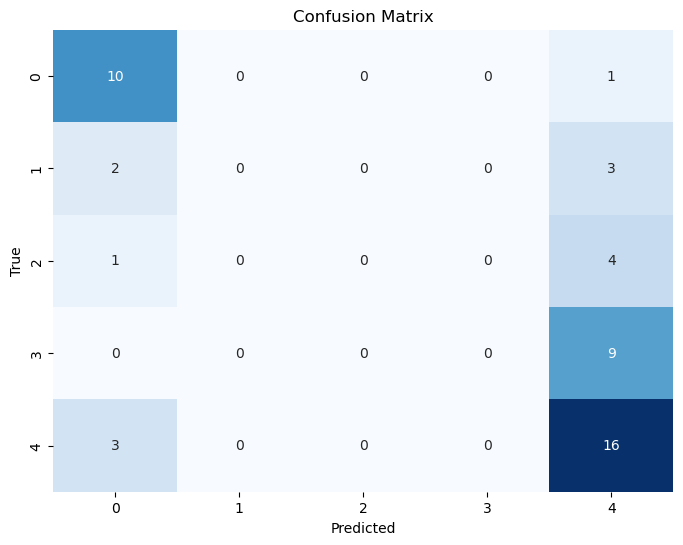

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.62      0.91      0.74        11
     Class 2       0.00      0.00      0.00         5
     Class 3       0.00      0.00      0.00         5
     Class 4       0.00      0.00      0.00         9
     Class 5       0.48      0.84      0.62        19

    accuracy                           0.53        49
   macro avg       0.22      0.35      0.27        49
weighted avg       0.33      0.53      0.40        49



E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)








In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.5306122448979592
Precision: 0.328308596165739
Recall: 0.5306122448979592
F1-Score: 0.4049072620501192


E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
